# Business Problem

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men?

In [1]:
import pandas as pd 
import numpy as np 
import seaborn  as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("walmart_data.txt")
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [3]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [4]:
df["Marital_Status"].replace(to_replace=[0,1],
           value=["Notmarried","Married"],inplace=True)

df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Notmarried,3,8370
1,1000001,P00248942,F,0-17,10,A,2,Notmarried,1,15200
2,1000001,P00087842,F,0-17,10,A,2,Notmarried,12,1422
3,1000001,P00085442,F,0-17,10,A,2,Notmarried,12,1057
4,1000002,P00285442,M,55+,16,C,4+,Notmarried,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,Married,20,368
550064,1006035,P00375436,F,26-35,1,C,3,Notmarried,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,Married,20,137
550066,1006038,P00375436,F,55+,1,C,2,Notmarried,20,365


In [5]:
df.describe()

,User_ID,Occupation,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,5.404270,9263.968713
std,1.727592e+03,6.522660,3.936211,5023.065394
min,1.000001e+06,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,20.000000,23961.000000


In [6]:
df.describe(include='object')

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years,Marital_Status
count,550068,550068,550068,550068,550068,550068
unique,3631,2,7,3,5,2
top,P00265242,M,26-35,B,1,Notmarried
freq,1880,414259,219587,231173,193821,324731


In [7]:
df.shape

(550068, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 42.0+ MB


In [9]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

In [10]:
df["Purchase"].sum()

5095812742

In [11]:
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Notmarried,3,8370
1,1000001,P00248942,F,0-17,10,A,2,Notmarried,1,15200
2,1000001,P00087842,F,0-17,10,A,2,Notmarried,12,1422
3,1000001,P00085442,F,0-17,10,A,2,Notmarried,12,1057
4,1000002,P00285442,M,55+,16,C,4+,Notmarried,8,7969
5,1000003,P00193542,M,26-35,15,A,3,Notmarried,1,15227
6,1000004,P00184942,M,46-50,7,B,2,Married,1,19215
7,1000004,P00346142,M,46-50,7,B,2,Married,1,15854
8,1000004,P0097242,M,46-50,7,B,2,Married,1,15686
9,1000005,P00274942,M,26-35,20,A,1,Married,8,7871


In [12]:
df["Gender"].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [13]:
df["Age"].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [14]:
df["Occupation"].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [15]:
df["Product_Category"].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64

In [16]:
df["City_Category"].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [17]:
df["Marital_Status"].value_counts()

Notmarried    324731
Married       225337
Name: Marital_Status, dtype: int64

In [18]:
df['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [19]:
df.head(1)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Notmarried,3,8370


# Insights 

*   There are no missing values in the data.

*   Male had purchased more products  then female during black friday.

*   People with  age between 26-45 are most frequent buyers then others .

*   People with  living in B category_city are most frequent buyers then others .
*   People that are new or  living in a city  for like 1 year only are most   frequent buyers then others . 

*   People who aren't married  are most frequent buyers then married one's .


*   Total of 20 product categories are there and people had bought with       product_category 5 & 1 more than other categories.

*   There are 20 differnent types of occupations and people had bought with occupation  of type 4 & 0 more than other types.

*   Purchase amount might have outliers.


<Axes: xlabel='City_Category', ylabel='count'>

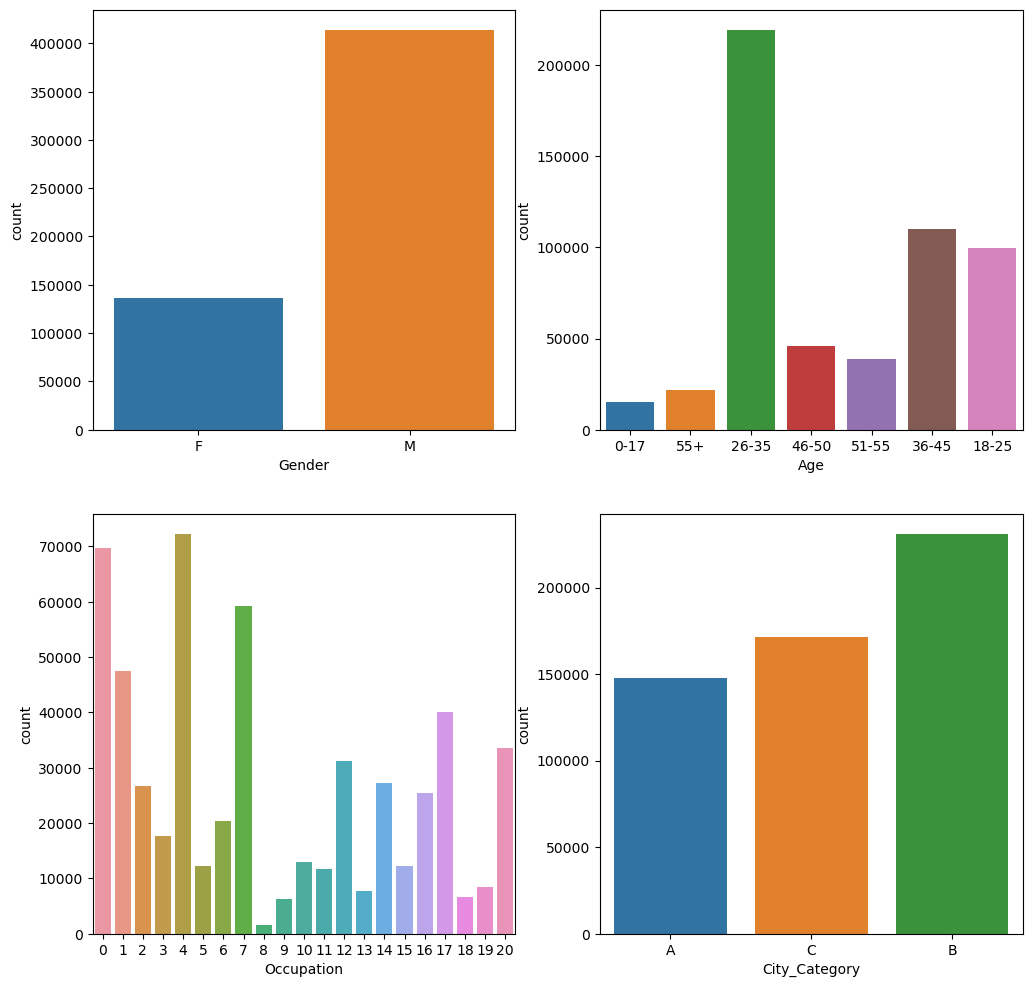

In [20]:
fig=plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
sns.countplot(data=df, x="Gender")

plt.subplot(2,2,2)
sns.countplot(data=df, x="Age")

plt.subplot(2,2,3)
sns.countplot(data=df, x="Occupation")

plt.subplot(2,2,4)
sns.countplot(data=df, x="City_Category")



<Axes: xlabel='Product_Category', ylabel='count'>

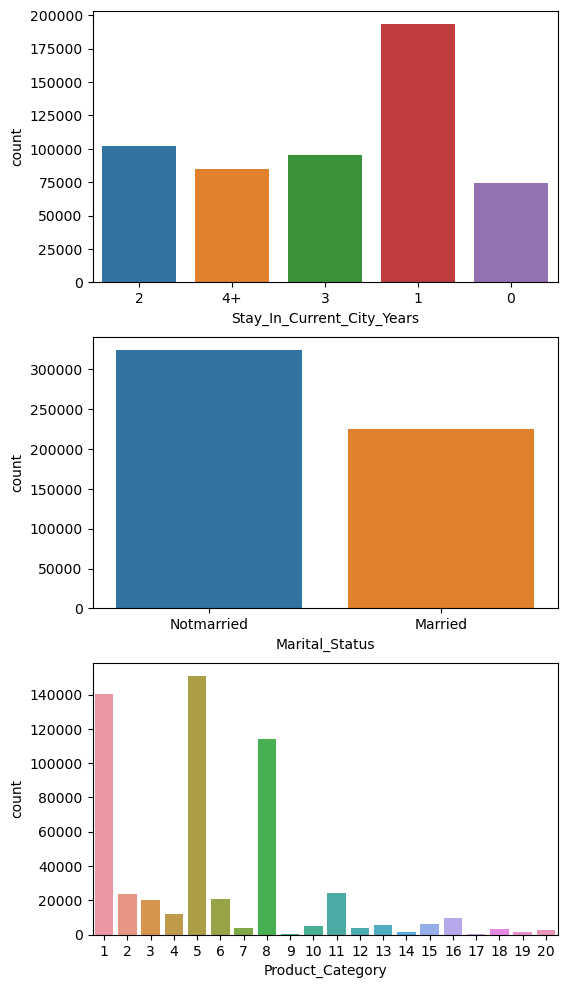

In [21]:
fig=plt.figure(figsize=(6,12))

plt.subplot(3,1,1)
sns.countplot(data=df, x="Stay_In_Current_City_Years")

plt.subplot(3,1,2)
sns.countplot(data=df, x="Marital_Status")

plt.subplot(3,1,3)
sns.countplot(data=df, x="Product_Category")

# Insights 


*    People that are kind of  new like living in a city for past  1 year only are most frequent buyers then others .

*   Married  customers are less compare to UnMarried .

*   Product_Category - 1, 5 & 8 have highest purchasing frequency.

<Axes: xlabel='Purchase'>

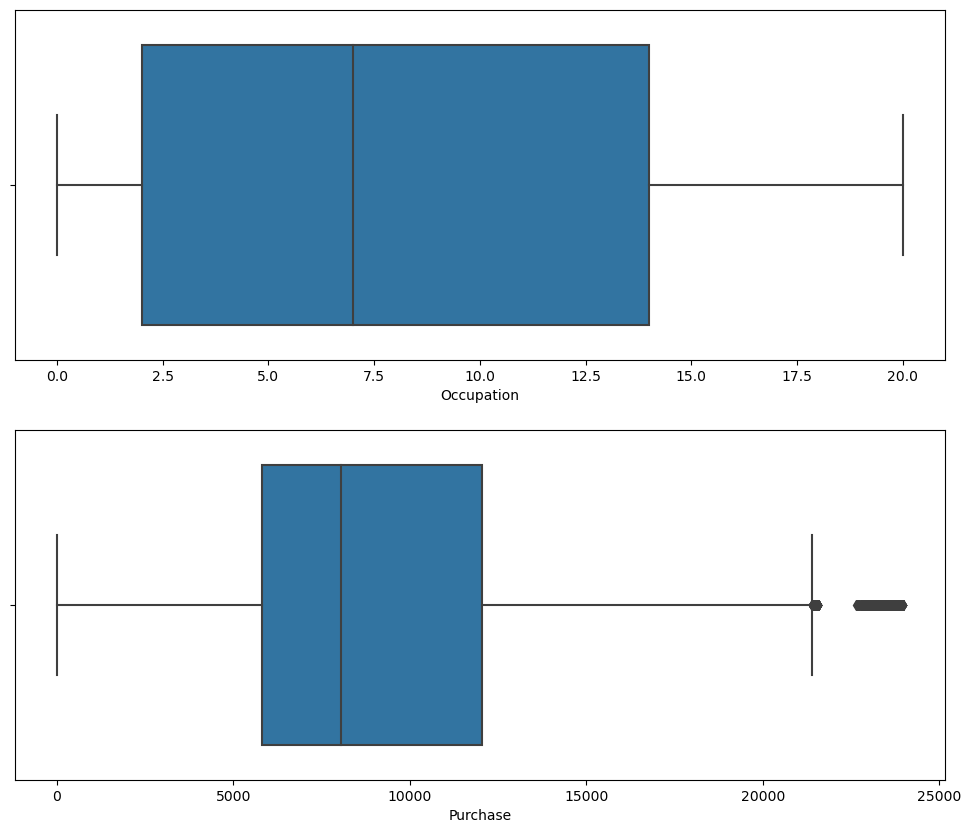

In [22]:
fig=plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
sns.boxplot(data=df, x="Occupation", orient='h') 
plt.subplot(2,1,2)
sns.boxplot(data=df, x="Purchase", orient='h')


In [23]:
Q1 = df['Purchase'].quantile(0.30)
Q3 = df['Purchase'].quantile(0.70)

IQR = Q3 - Q1

print(IQR)
df1 = df[-((df['Purchase'] < (Q1- 1.5* IQR)) | (df['Purchase'] > (Q3+ 1.5* IQR)))]
df1 = df1.reset_index(drop = True)

5392.0


<Axes: xlabel='Purchase'>

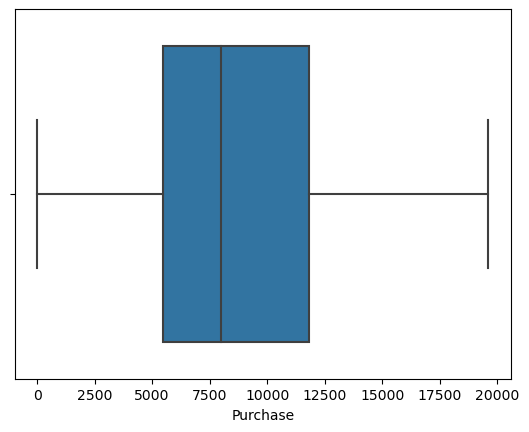

In [24]:
sns.boxplot(data=df1, x="Purchase", orient='h')

In [25]:
0

0

# Insights

From above box plot we can see that **Purchase** has **many outliers**  and **occupations** has **no outliers**.




In [26]:
df_gender=df.groupby(["Gender"])["User_ID"].nunique()
df_gender=df_gender.reset_index()

In [27]:
df_gender["User_ID"]=(df_gender["User_ID"]/df["User_ID"].nunique())*100

In [28]:
df_gender

,Gender,User_ID
0,F,28.280428
1,M,71.719572


Text(0.5, 1.0, 'Gender % on unique USER_ID')

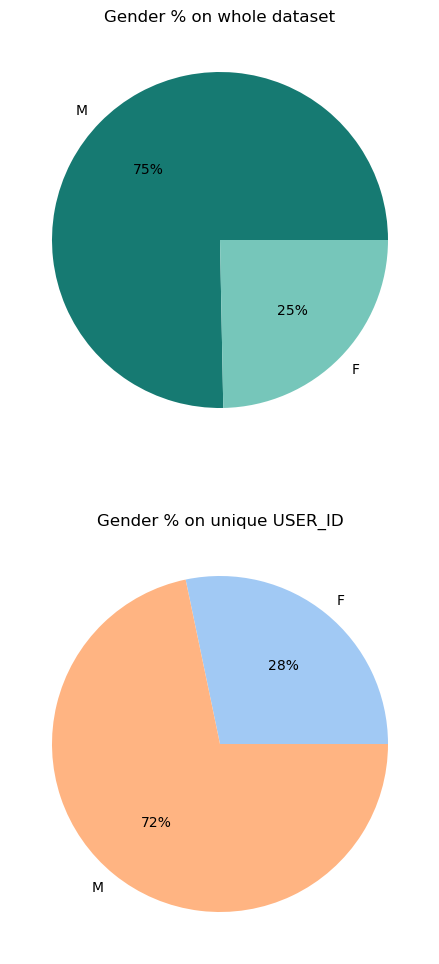

In [29]:
fig=plt.figure(figsize=(6,12))

plt.subplot(2,1,1)
data = df['Gender'].value_counts(normalize=True)*100
palette_color = sns.color_palette('BrBG_r')
plt.pie(x=data.values, labels=data.index, autopct='%.0f%%', colors=palette_color)
plt.title("Gender % on whole dataset")

plt.subplot(2,1,2)
data1 = df_gender["Gender"]
data2 =df_gender["User_ID"]
palette_color = sns.color_palette('pastel')
plt.pie(x=data2, labels=data1,autopct='%.0f%%', colors=palette_color)
plt.title("Gender % on unique USER_ID")


***Above two graphs are self-explanatory.***

In [30]:
df2 = df[["Gender","Age","City_Category","Stay_In_Current_City_Years","Marital_Status"]].melt()
df2=round((df2.groupby(['variable', 'value'])[['value']].count() *100)/ len(df),1)
df2.rename(columns={"value":"%value"})

%value
variable                   value             
Age                        0-17           2.7
                           18-25         18.1
                           26-35         39.9
                           36-45         20.0
                           46-50          8.3
                           51-55          7.0
                           55+            3.9
City_Category              A             26.9
                           B             42.0
                           C             31.1
Gender                     F             24.7
                           M             75.3
Marital_Status             Married       41.0
                           Notmarried    59.0
Stay_In_Current_City_Years 0             13.5
                           1             35.2
                           2             18.5
                           3             17.3
                           4+            15.4

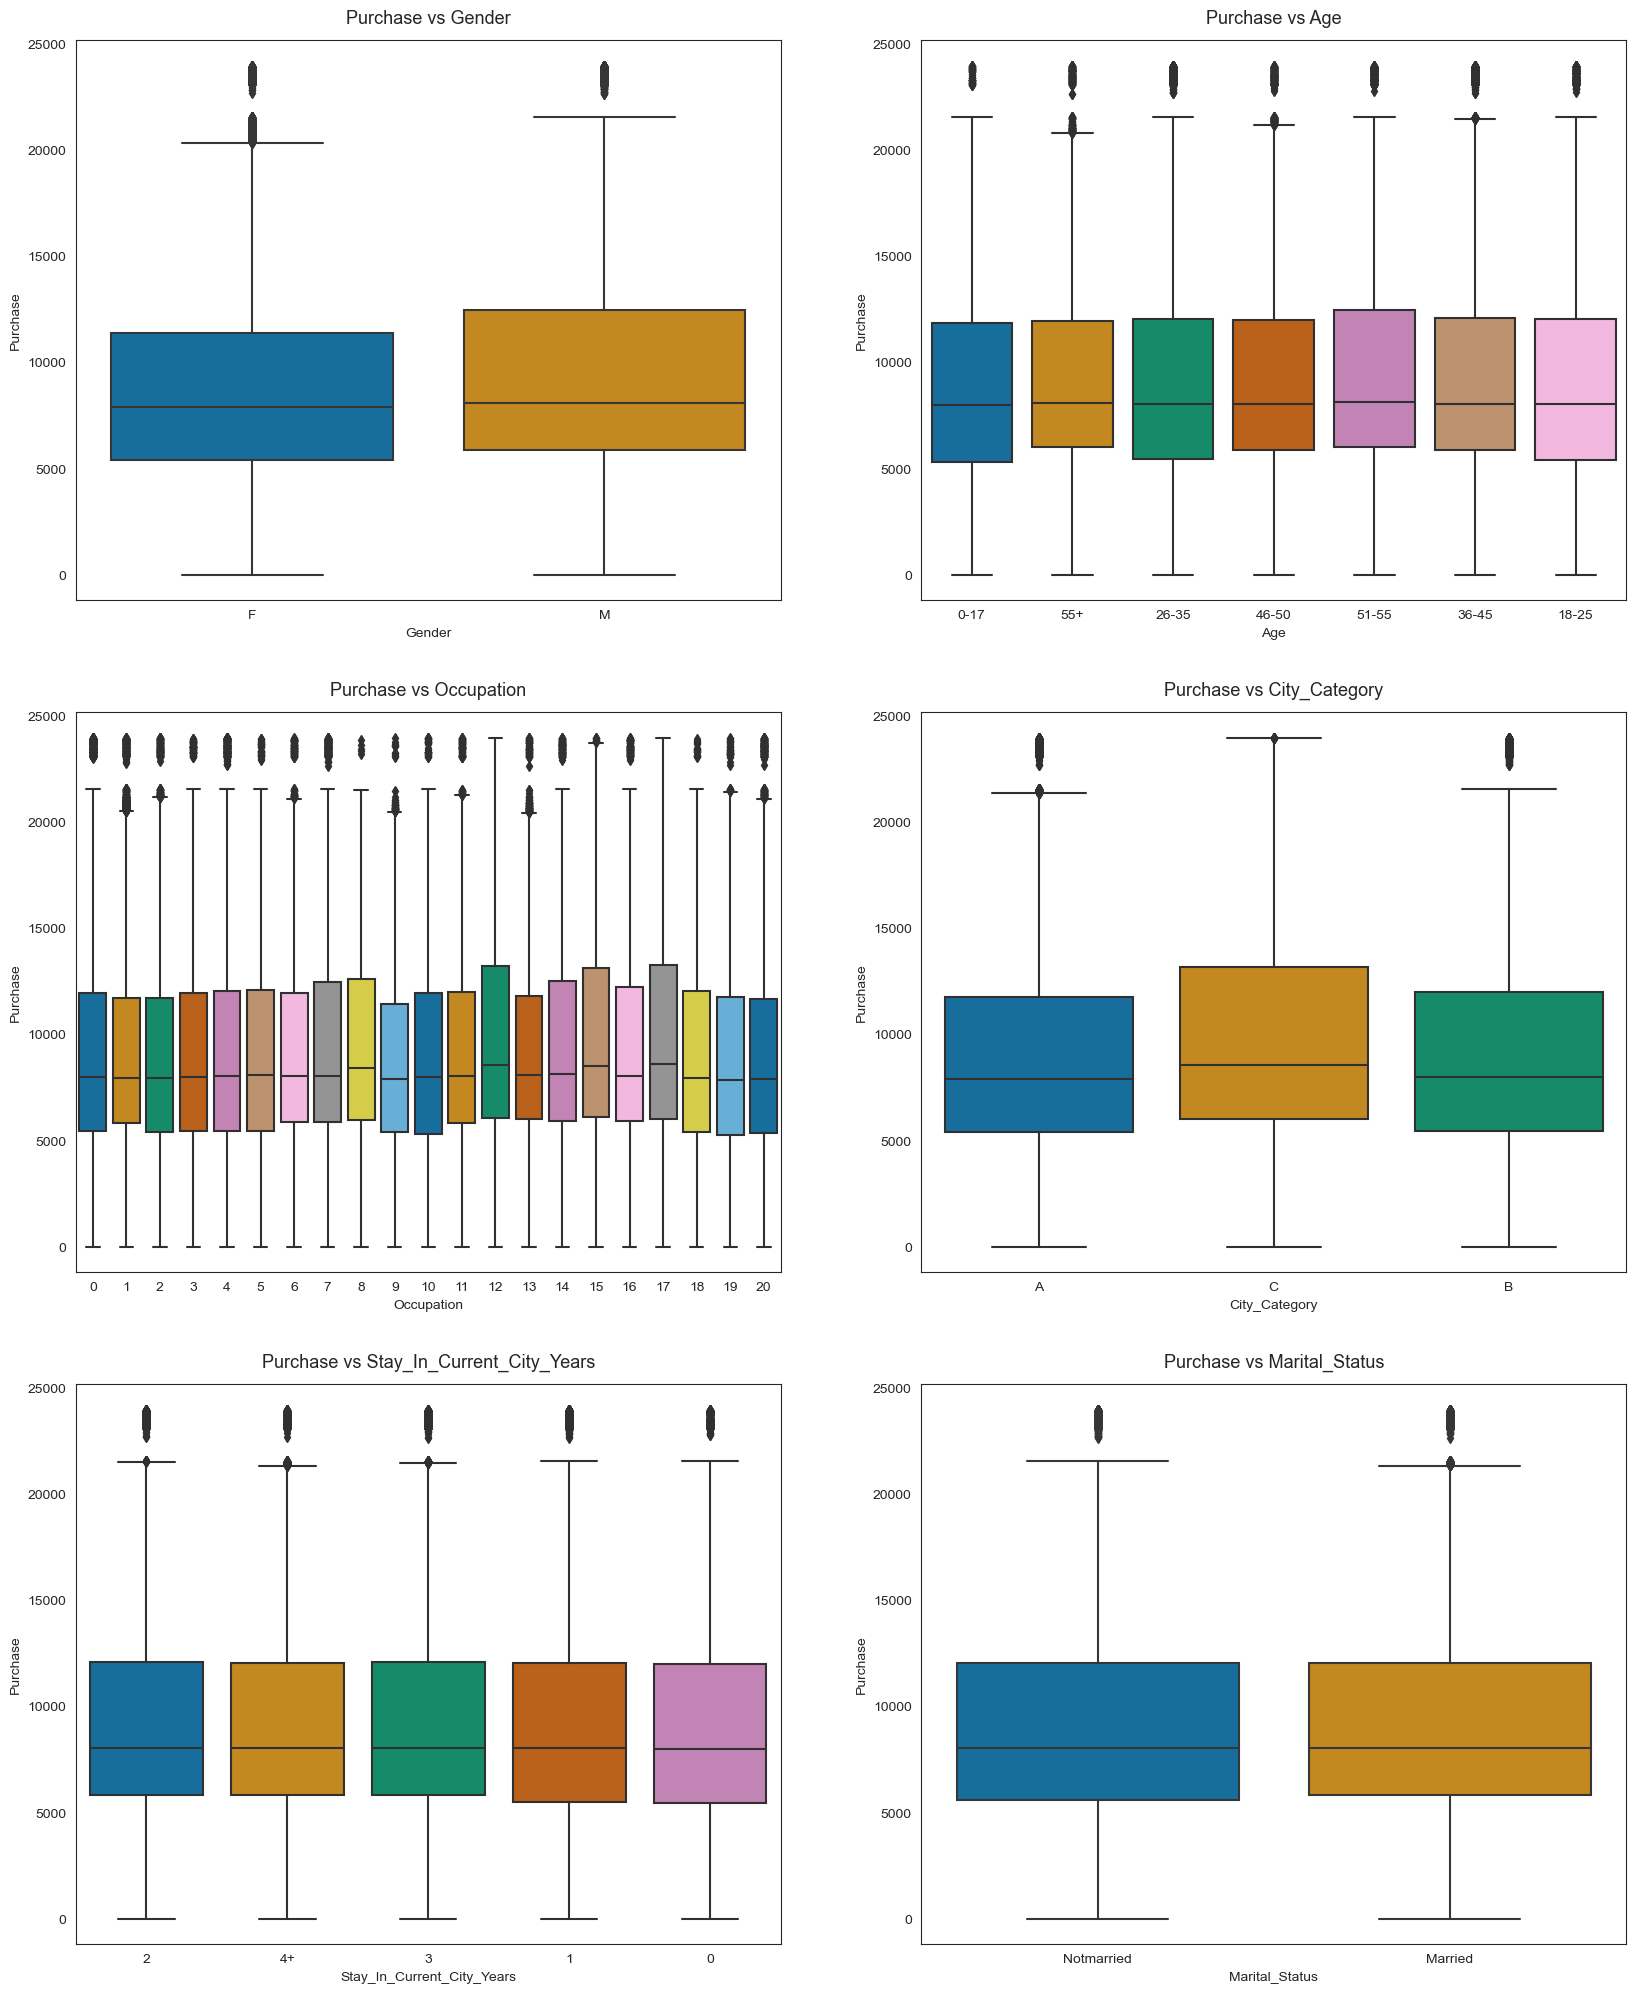

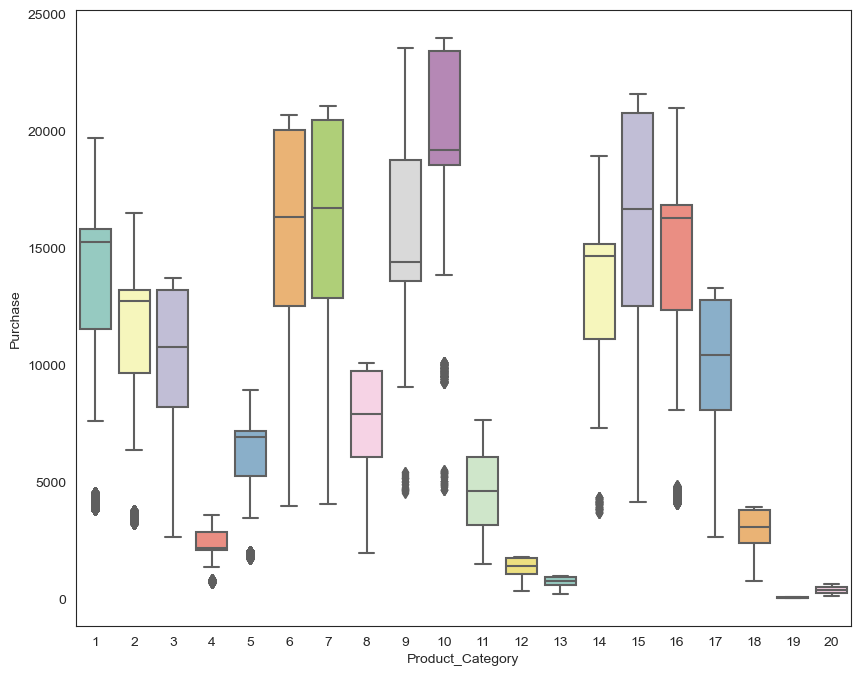

In [32]:
attrs = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
sns.set_style("white")

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 16))
fig.subplots_adjust(top=1.3)
count = 0
for row in range(3):
    for col in range(2):
        sns.boxplot(data=df, y='Purchase', x=attrs[count], ax=axs[row, col], palette='colorblind')
        axs[row,col].set_title(f"Purchase vs {attrs[count]}", pad=12, fontsize=13)
        count += 1
plt.show()

plt.figure(figsize=(10, 8))
sns.boxplot(data=df, y='Purchase', x=attrs[-1], palette='Set3')
plt.show()

## Insights


*   Median value of purchase amount are kind of same for male and female customers.
*   Median value of purchase amount for 9,19,20  are kind a lowest than others.


*   Median value of purchase amount for city of category c is more than others since people living in c category city have purchases on higher side .
*   People who are new to the city or living for a long time have same median purchase amount.

*   Purcahse amount for married and unmarried are kind of same .
*   Product that belong to product_category 10 are costliest.

*   Product that belong to product_category 12,13,19,20 have lowest purcahse amount(cheapest).





Text(0.5, 1.0, 'Purcahses based on Marital Status & Gender')

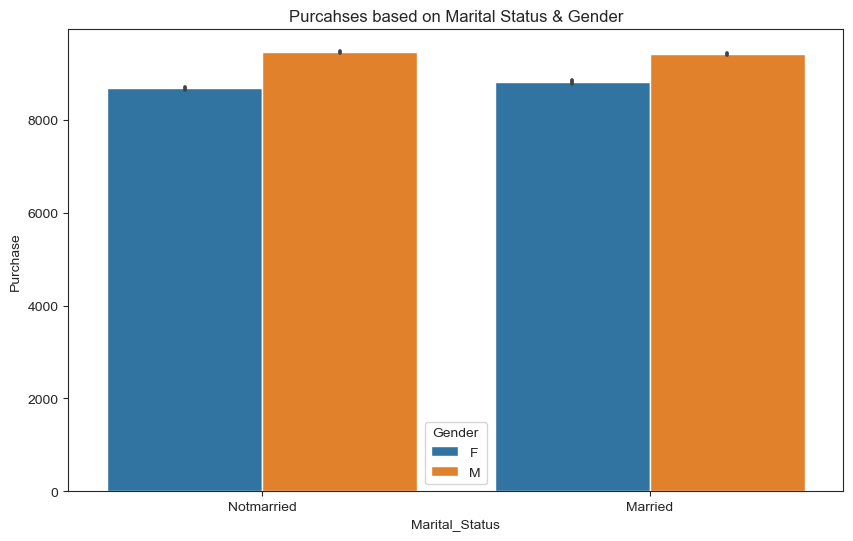

In [33]:
plt.figure(figsize =(10,6))
sns.set_style("ticks")
sns.barplot(x="Marital_Status",y=df["Purchase"],hue = "Gender",data = df)
plt.title("Purcahses based on Marital Status & Gender")

# Insight

*   Males married or unmarried have high Average purchase amount than females.



Text(0.5, 1.0, 'Purcahses based on Age & Gender')

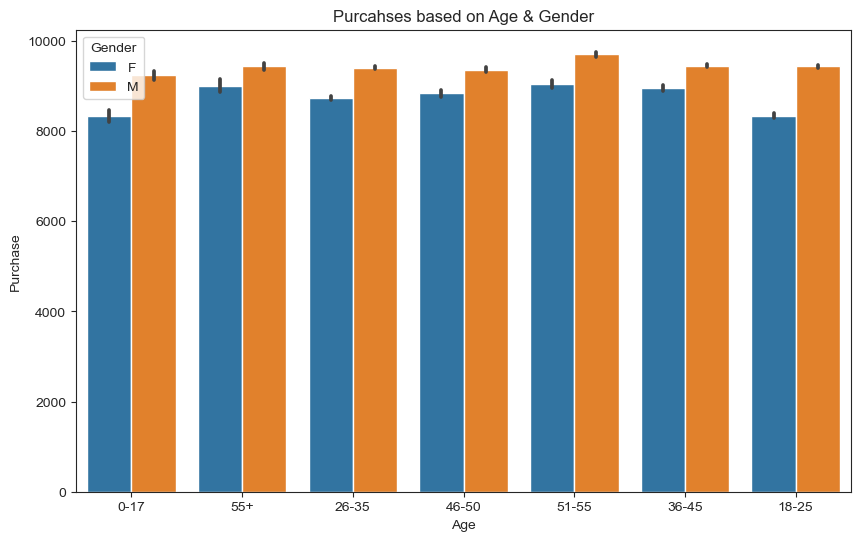

In [34]:
plt.figure(figsize =(10,6))
sns.set_style("ticks")
sns.barplot(x="Age",y="Purchase",hue = "Gender",data = df)
plt.title("Purcahses based on Age & Gender")

# Insight

*   Males belonging  to any age group  have high Average purchase amount than females.

Text(0.5, 1.0, 'Purcahses based on City category & Gender')

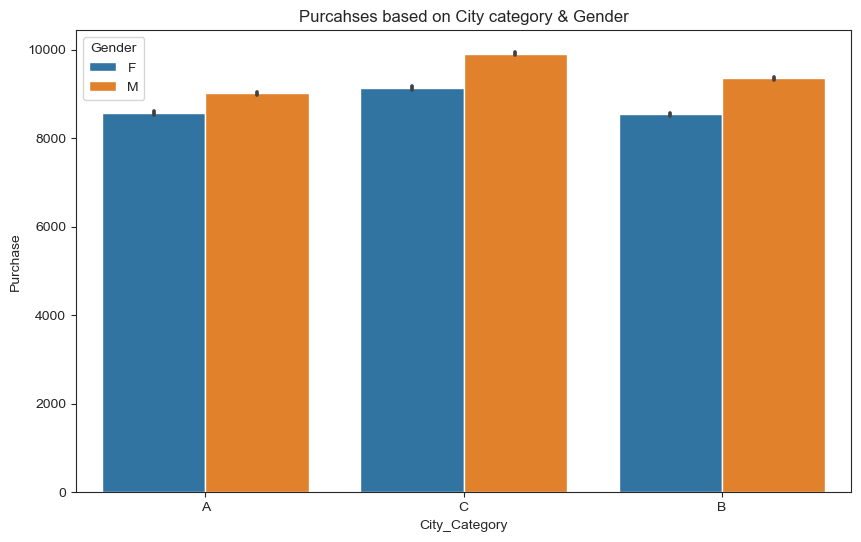

In [35]:
plt.figure(figsize =(10,6))
sns.set_style("ticks")
sns.barplot(x="City_Category",y="Purchase",hue = "Gender",data = df)
plt.title("Purcahses based on City category & Gender")

# Insight

*   Males belonging  to any category of city  have high Average purchase amount than females.

In [36]:
df_mg=df.groupby(["Marital_Status","Gender"])["Purchase"].sum()
df_mg=df_mg.reset_index()
df_mg

,Marital_Status,Gender,Purchase
0,Married,F,502078515
1,Married,M,1584806780
2,Notmarried,F,684154127
3,Notmarried,M,2324773320


Text(0.5, 1.0, 'Total purchase based on marital status and gender')

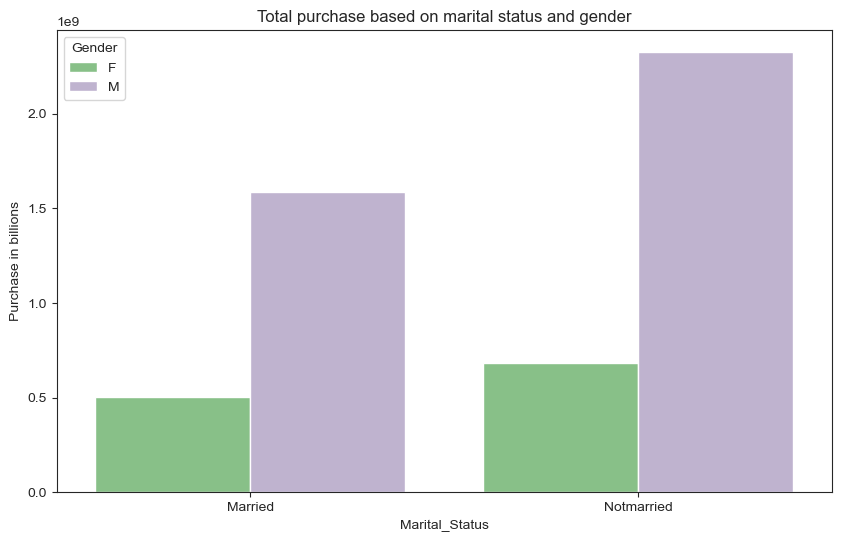

In [37]:
plt.figure(figsize =(10,6))
sns.set_style("ticks")
sns.barplot(x="Marital_Status",y="Purchase",hue = "Gender",data = df_mg,palette="Accent")
plt.ylabel("Purchase in billions")
plt.title("Total purchase based on marital status and gender")

# Insight

*   Males married or unmarried have high total purchase amount than females.

In [38]:
df_age=df.groupby(["Age","Gender"])["Purchase"].sum()
df_age=df_age.reset_index()
df_age

,Age,Gender,Purchase
0,0-17,F,42385978
1,0-17,M,92527205
2,18-25,F,205475842
3,18-25,M,708372833
4,26-35,F,442976233
5,26-35,M,1588794345
6,36-45,F,243438963
7,36-45,M,783130921
8,46-50,F,116706864
9,46-50,M,304136539


Text(0.5, 1.0, 'Total purchase based on Age and gender')

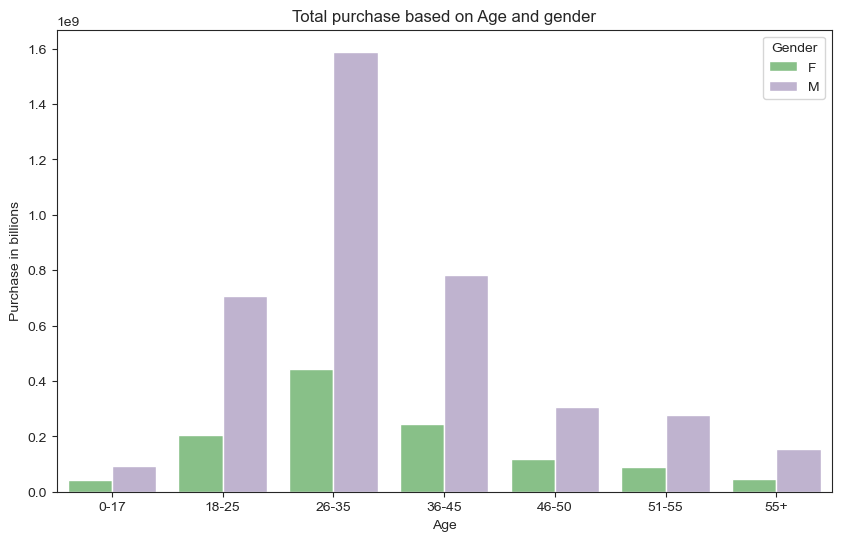

In [39]:
plt.figure(figsize =(10,6))
sns.set_style("ticks")
sns.barplot(x="Age",y="Purchase",hue = "Gender",data = df_age,palette="Accent")
plt.ylabel("Purchase in billions")
plt.title("Total purchase based on Age and gender")

# Insight

*   Males belonging  to any age group  have high Total purchase amount than females.

In [40]:
df_ct=df.groupby(["City_Category","Gender"])["Purchase"].sum()
df_ct=df_ct.reset_index()
df_ct

,City_Category,Gender,Purchase
0,A,F,306329915
1,A,M,1010141746
2,B,F,493617008
3,B,M,1621916597
4,C,F,386285719
5,C,M,1277521757


Text(0.5, 1.0, 'Total purchase based on City Category and gender')

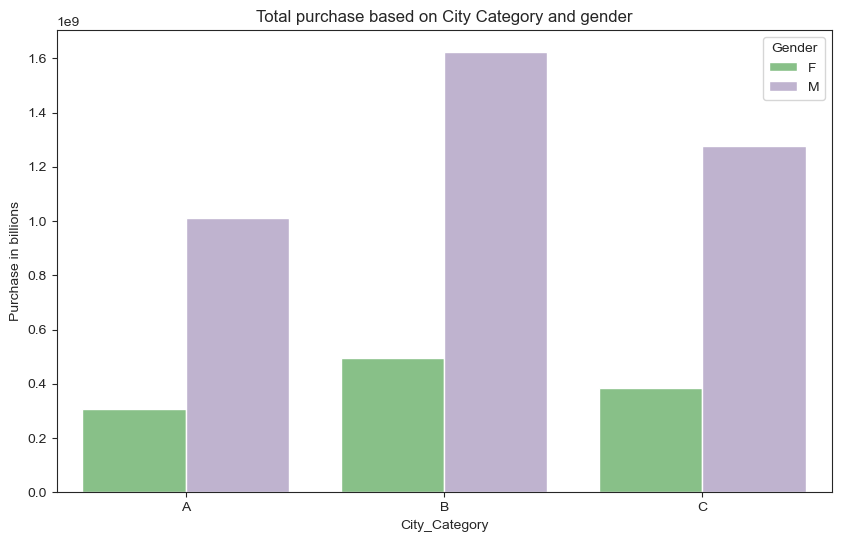

In [41]:
plt.figure(figsize =(10,6))
sns.set_style("ticks")
sns.barplot(x="City_Category",y="Purchase",hue = "Gender",data = df_ct,palette="Accent")
plt.ylabel("Purchase in billions")
plt.title("Total purchase based on City Category and gender")

# Insight

*   Males belonging  to any category of city  have high total purchase amount than females.

<Axes: xlabel='Gender', ylabel='Purchase'>

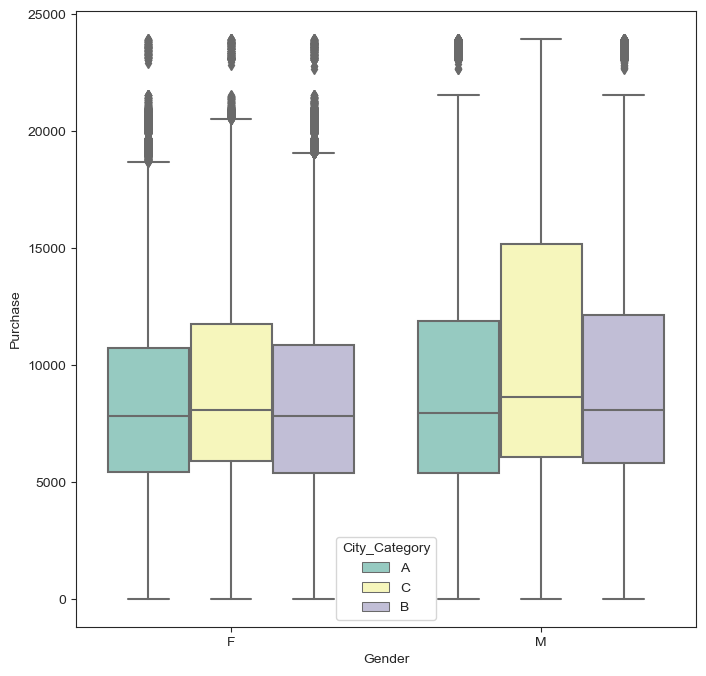

In [42]:
plt.figure(figsize =(8,8))
sns.boxplot(data=df, y='Purchase', x='Gender', hue='City_Category', palette='Set3')

# Insight

*    people either Male or Female belonging  to C category city  make costliest purchases.

C:\Users\HP\AppData\Local\Temp\ipykernel_12820\3959035813.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap="coolwarm")


<Axes: >

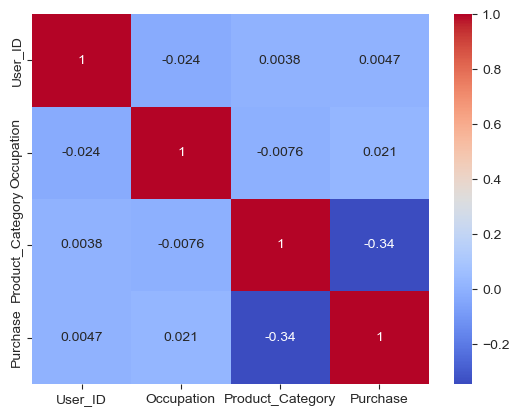

In [43]:
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

# Insight

*   **Purchase and product_category  are very less correlated**

In [44]:
df_male= df.loc[df["Gender"]=="M",["Purchase"]]
df_male

,Purchase
4,7969
5,15227
6,19215
7,15854
8,15686
...,...
550057,61
550058,121
550060,494
550062,473


In [45]:
df_female= df.loc[df["Gender"]=="F",["Purchase"]]
df_female

,Purchase
0,8370
1,15200
2,1422
3,1057
14,5378
...,...
550061,599
550064,371
550065,137
550066,365


In [46]:
male_avg = df_male['Purchase'].mean()
print("Population male mean",male_avg)
female_avg = df_female['Purchase'].mean()
print("Population female mean",female_avg)
male_std = np.std(df_male['Purchase'])
print("Population male SD",male_std)
female_std = np.std(df_female['Purchase'])
print("Population female SD",female_std)

Population male mean 9437.526040472265
Population female mean 8734.565765155476
Population male SD 5092.180063635943
Population female SD 4767.215738016988


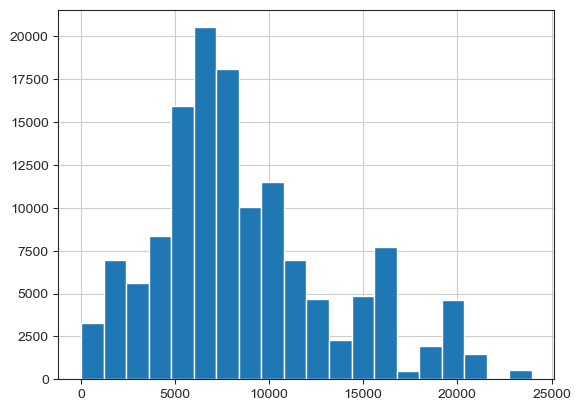

In [47]:
df_female['Purchase'].hist(bins=20)
plt.show()

# Recommendations


*   Men spend more money than women, So company should focus on retaining the male customers and getting more male customers.
*   Since Female spent less compare to male. So comapny can add more products that female tends to buy on regular basis that will attract more female customers.
*   Unmarried customers spend more money than married customers, So company should focus on retaining there  Unmarried customers  and also think of a strategy so that married customers tends to buys more .
*   Product_Category - 1, 5, 8  have highest purchasing frequency. it means these are the products in these categories are liked more by customers. Company can focus on selling more of these products.

*   Customers in the age 18-45 spend more money than the others, So company should focus on retaining these customers.
*   People Living in C category cities have high purchase amount so company can add more products in these cities.




